In [175]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
from env import get_connection
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML, display


In [8]:
query = '''
        SELECT sale_date, sale_amount,
        item_brand, item_name, item_price,
        store_address, store_zipcode,
        store_city, store_state 
        FROM sales
        LEFT JOIN items USING (item_id)
        LEFT JOIN stores USING(store_id)
        '''

In [9]:
url = get_connection('tsa_item_demand')

In [10]:
df = pd.read_sql(query, url)
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [11]:
df.shape

(913000, 9)

In [12]:
df.isna().sum()

sale_date        0
sale_amount      0
item_brand       0
item_name        0
item_price       0
store_address    0
store_zipcode    0
store_city       0
store_state      0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_date      913000 non-null  object 
 1   sale_amount    913000 non-null  int64  
 2   item_brand     913000 non-null  object 
 3   item_name      913000 non-null  object 
 4   item_price     913000 non-null  float64
 5   store_address  913000 non-null  object 
 6   store_zipcode  913000 non-null  object 
 7   store_city     913000 non-null  object 
 8   store_state    913000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 62.7+ MB


## 1. Convert date colum to datetime format

In [14]:
df.sale_date = pd.to_datetime(df.sale_date)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   sale_date      913000 non-null  datetime64[ns]
 1   sale_amount    913000 non-null  int64         
 2   item_brand     913000 non-null  object        
 3   item_name      913000 non-null  object        
 4   item_price     913000 non-null  float64       
 5   store_address  913000 non-null  object        
 6   store_zipcode  913000 non-null  object        
 7   store_city     913000 non-null  object        
 8   store_state    913000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 62.7+ MB


## 2. Plot the distribution of sale_amount and item_price

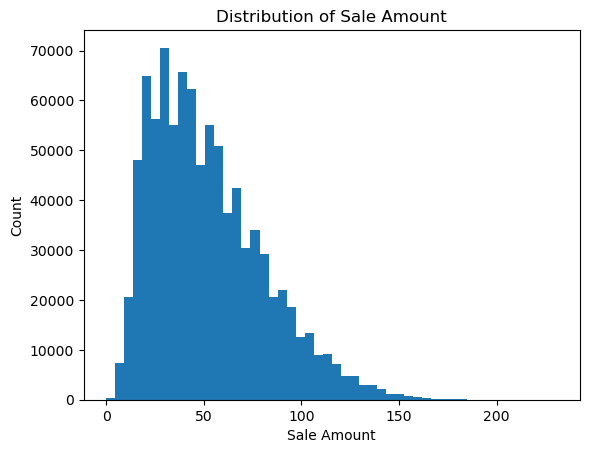

In [22]:
plt.hist(df.sale_amount, bins = 50)
plt.xlabel('Sale Amount')
plt.ylabel('Count')
plt.title('Distribution of Sale Amount')
plt.show()

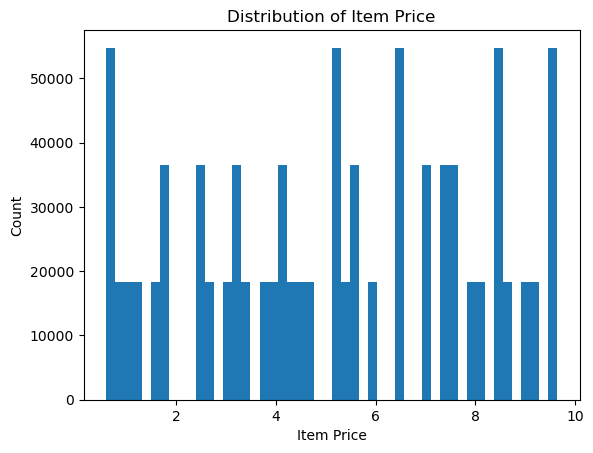

In [24]:
plt.hist(df.item_price, bins = 50)
plt.xlabel('Item Price')
plt.ylabel('Count')
plt.title('Distribution of Item Price')
plt.show()

## 3. Set the index to be the datetime variable

In [25]:
df = df.set_index('sale_date').sort_index()

In [26]:
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX


In [27]:
df['month'] = df.index.month_name()

In [28]:
df['day'] = df.index.day_name()

In [29]:
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day
sale_date,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX,January,Tuesday
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX,January,Tuesday


## 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total_items) and item_price

In [30]:
df['sales_total'] = df.sale_amount * df.item_price
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day,sales_total
sale_date,,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX,January,Tuesday,294.00


## 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [35]:
import os

def store_data():
    
    filename = 'stores.csv'
    
    if os.path.isfile(filename):
        
        print('Found Data')
        
        return pd.read_csv(filename)
    
    else:
    
        print('Retrieving Data')

        query = '''
                SELECT sale_date, sale_amount,
                item_brand, item_name, item_price,
                store_address, store_zipcode,
                store_city, store_state 
                FROM sales
                LEFT JOIN items USING (item_id)
                LEFT JOIN stores USING(store_id)
                '''
        url = get_connection('tsa_item_demand')

        df = pd.read_sql(query, url)

        df.to_csv(filename, index = 0)

        return df

In [38]:
def prep_store():
    
    df = store_data()

    df.sale_date = pd.to_datetime(df.sale_date)

    df = df.set_index('sale_date').sort_index()

    df['month'] = df.index.month_name()

    df['day'] = df.index.day_name()

    df['sales_total'] = df.sale_amount * df.item_price
    
    return df

In [173]:
def date_index(df):
    
    df = store_data()
    
    for col in df.columns:

        try:
            # Attempt to convert each value to datetime
            df[col] = pd.to_datetime(df[col])

            df = df.set_index(col).sort_index()

            df['month'] = df.index.month_name()

            df['day'] = df.index.day_name()

            # Check for consistent date format (adjust the format as needed)
            return df

        except ValueError:

            return False

In [159]:
def plt_dist(df, feats, loop = False):
    
    if loop:
        
        for col in df.columns:

            plt.hist(df[col], bins = 50)

            plt.xlabel(f'{col.replace("_", " ").title()}')

            plt.ylabel('Count')

            plt.title(f'Distribution of {col.replace("_", " ").title()}')

            plt.show()
            
    else: 
        
        plt.hist(df[feats], bins = 50)

        plt.xlabel(f'{feats.replace("_", " ").title()}')

        plt.ylabel('Count')

        plt.title(f'Distribution of {feats.replace("_", " ").title()}')

        plt.show()

In [168]:
def summarize(df):
    
    text = 'Shape:'
    bold_text = f'<b>{text}</b>'
    display(HTML(bold_text))
    print(df.shape)
    print('_________________________________________________')
    
    text = 'Info:'
    bold_text = f'<b>{text}</b>'
    display(HTML(bold_text))
    df.info()
    print('')
    print('_________________________________________________')
    
    text = 'Null Values:'
    bold_text = f'<b>{text}</b>'
    display(HTML(bold_text))
    print('')
    print(df.isna().sum())
    print('')
    print('_________________________________________________')
    
    for col in df.columns.values:
        text = f'Value Count for {col}:'
        bold_text = f'<b>{text}</b>'
        display(HTML(bold_text))

        print('')
        vc = df[col].value_counts()
        print(vc)
        print('_________________________________________________')
        print('')

In [177]:
df = date_index(df)
df.head()

Found Data


,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day
sale_date,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX,January,Tuesday
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX,January,Tuesday


In [178]:
summarize(df)

(913000, 10)
_________________________________________________


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  int64  
 1   item_brand     913000 non-null  object 
 2   item_name      913000 non-null  object 
 3   item_price     913000 non-null  float64
 4   store_address  913000 non-null  object 
 5   store_zipcode  913000 non-null  int64  
 6   store_city     913000 non-null  object 
 7   store_state    913000 non-null  object 
 8   month          913000 non-null  object 
 9   day            913000 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 76.6+ MB

_________________________________________________



sale_amount      0
item_brand       0
item_name        0
item_price       0
store_address    0
store_zipcode    0
store_city       0
store_state      0
month            0
day              0
dtype: int64

_________________________________________________



30     14283
27     14231
26     14212
29     14178
28     14164
       ...  
199        1
214        1
207        1
0          1
201        1
Name: sale_amount, Length: 213, dtype: int64
_________________________________________________




Usda Produce              36520
Riceland                  18260
Sally Hansen              18260
Munchies                  18260
Zhenas Gypsy Tea          18260
Barefoot                  18260
Amys                      18260
Heinz                     18260
Natures Way               18260
Sundown Naturals          18260
Nakano                    18260
Deerfields Gluten Free    18260
The First Years           18260
Halls                     18260
Ferrara                   18260
Doctors Best              18260
Betty Crocker             18260
Moms Best Naturals        18260
Reese                     18260
Triaminic                 18260
P.f. Changs               18260
Morton                    18260
Hood                      18260
Petmate                   18260
Twinings Of London        18260
Mueller                   18260
Van De Kamps              18260
Mama Marys                18260
Garnier Nutritioniste     18260
Pamprin                   18260
Kelloggs                  18260
Ahold  


Riceland American Jazmine Rice                                                                       18260
Tomy The First Years Gumdrop Orthodontic Pacifiers 6m+ - 2ct                                         18260
Munchies Sandwich Crackers Cheddar Cheese On Golden Toast Crackers - 8 Pk                            18260
Zhenas Gypsy Tea Herbal Red Tea Sachets Fire Light Chai - 22 Ct                                      18260
Barefoot Pinot Grigio  187                                                                           18260
Guava                                                                                                18260
Amys Light & Lean Spaghetti Italiano                                                                 18260
Heinz Tomato Ketchup - 2 Ct                                                                          18260
Natures Way Forskohlii - 60 Ct                                                                       18260
Sundown Naturals Essential Electroly


8.40    36520
5.62    36520
2.43    36520
3.45    18260
8.39    18260
9.02    18260
4.21    18260
0.68    18260
7.52    18260
0.60    18260
8.65    18260
5.19    18260
0.84    18260
6.93    18260
7.95    18260
6.52    18260
4.17    18260
8.09    18260
7.31    18260
2.97    18260
1.78    18260
0.98    18260
6.01    18260
9.59    18260
1.79    18260
9.64    18260
3.72    18260
4.65    18260
6.47    18260
7.54    18260
4.40    18260
3.17    18260
7.38    18260
3.93    18260
7.06    18260
1.16    18260
4.39    18260
0.74    18260
5.17    18260
9.11    18260
5.20    18260
9.54    18260
3.14    18260
2.61    18260
6.44    18260
1.68    18260
5.34    18260
Name: item_price, dtype: int64
_________________________________________________




12125 Alamo Ranch Pkwy     91300
12018 Perrin Beitel Rd     91300
15000 San Pedro Ave        91300
735 SW Military Dr         91300
8503 NW Military Hwy       91300
1015 S WW White Rd         91300
9255 FM 471 West           91300
1520 Austin Hwy            91300
2118 Fredericksburg Rdj    91300
516 S Flores St            91300
Name: store_address, dtype: int64
_________________________________________________




78253    91300
78217    91300
78232    91300
78221    91300
78231    91300
78220    91300
78251    91300
78218    91300
78201    91300
78204    91300
Name: store_zipcode, dtype: int64
_________________________________________________




San Antonio    913000
Name: store_city, dtype: int64
_________________________________________________




TX    913000
Name: store_state, dtype: int64
_________________________________________________




January      77500
March        77500
May          77500
July         77500
August       77500
October      77500
December     77500
April        75000
June         75000
September    75000
November     75000
February     70500
Name: month, dtype: int64
_________________________________________________




Tuesday      130500
Wednesday    130500
Thursday     130500
Friday       130500
Saturday     130500
Sunday       130500
Monday       130000
Name: day, dtype: int64
_________________________________________________



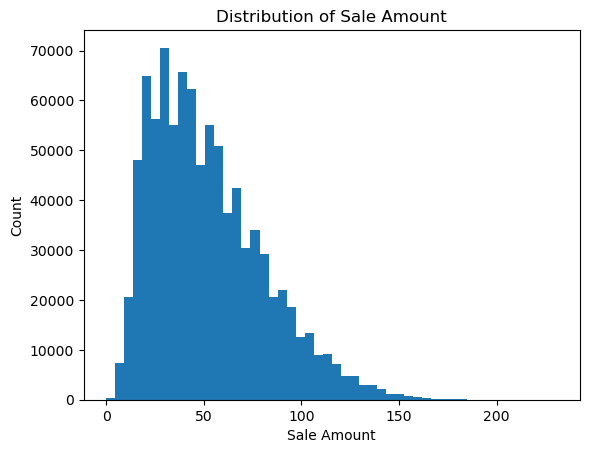

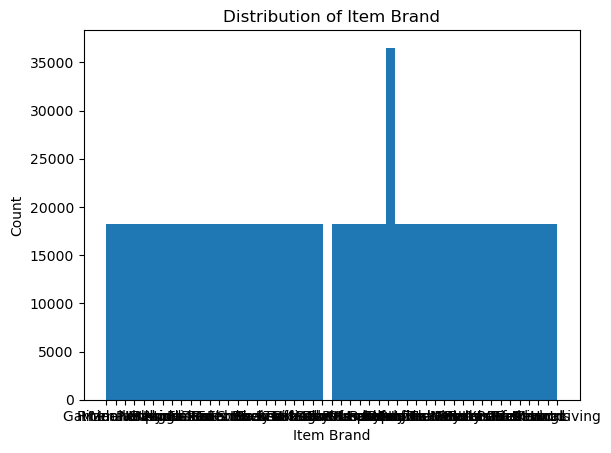

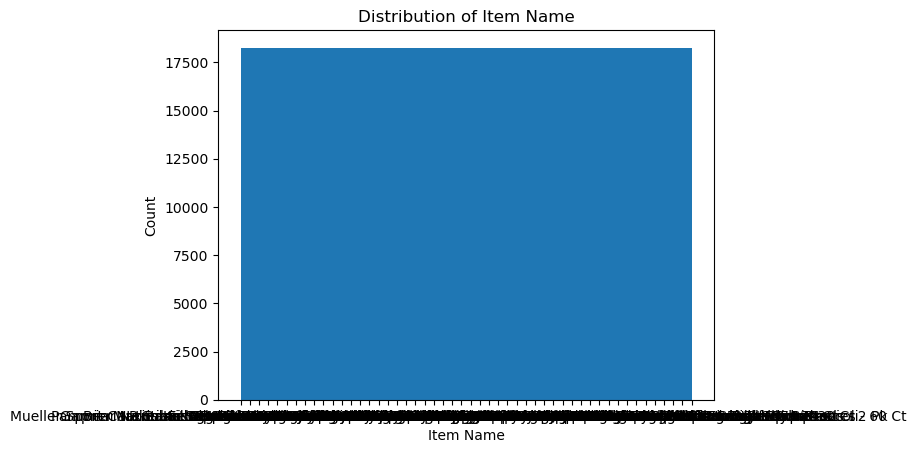

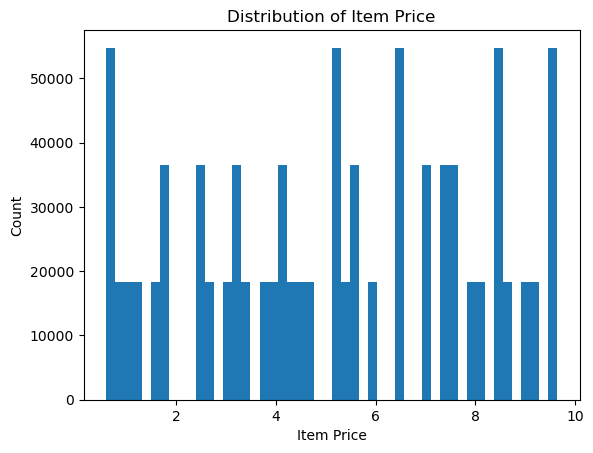

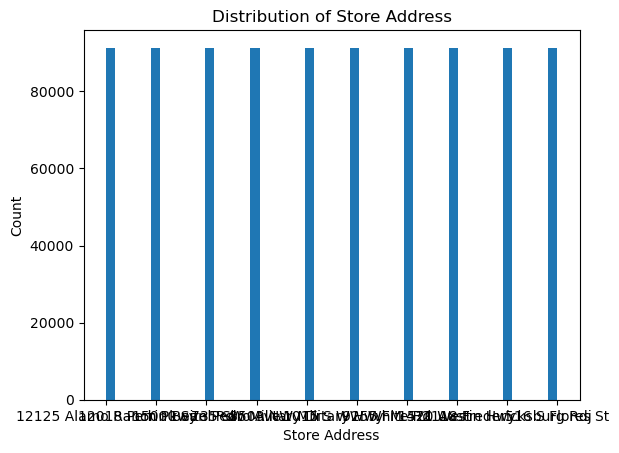

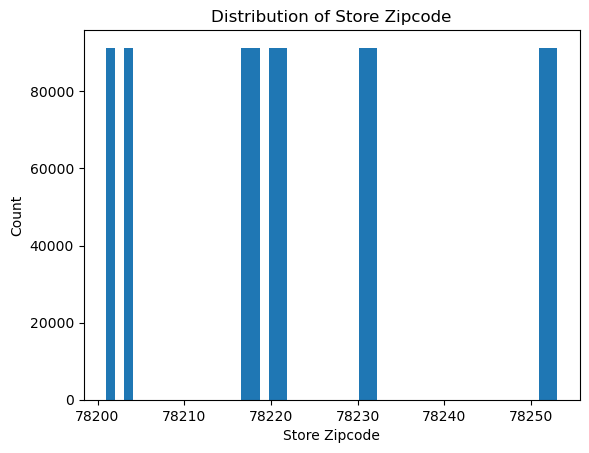

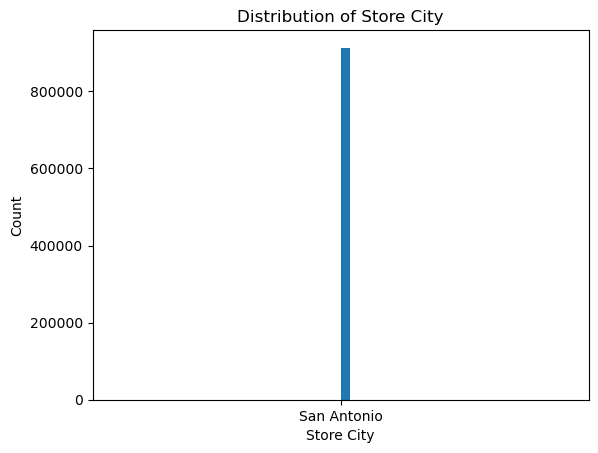

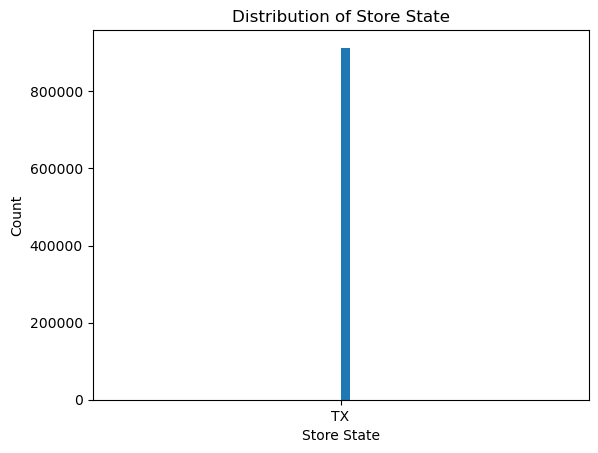

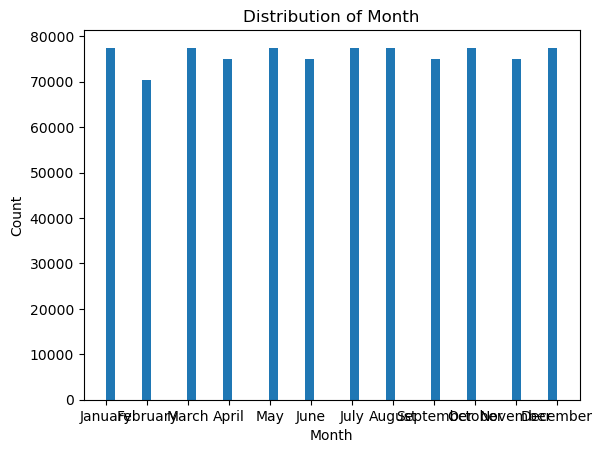

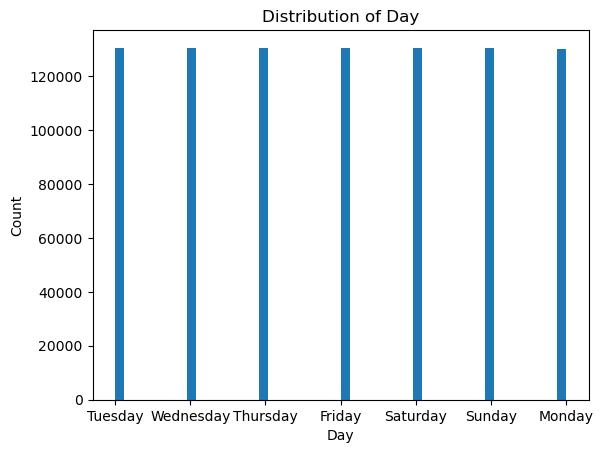

In [180]:
plt_dist(df,'sale_amount', loop = True)

In [181]:
len(df.month)

913000